# Population by commune

In [1]:
from pynsee.geodata import *

import math
import geopandas as gpd
import pandas as pd
from pandas.api.types import CategoricalDtype
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import descartes

In [2]:
import warnings
from shapely.errors import ShapelyDeprecationWarning
warnings.filterwarnings("ignore", category=ShapelyDeprecationWarning)

In [3]:
# get geographical data list
geodata_list = get_geodata_list()
# get departments geographical limits
com = get_geodata('ADMINEXPRESS-COG-CARTO.LATEST:commune')

Previously saved data used
/home/jovyan/.cache/pynsee/pynsee/2ac583be54e866b2b1b30fb0113c1fd0
Set update=True to get the most up-to-date data
Previously saved data used
/home/jovyan/.cache/pynsee/pynsee/a4f589755961ab3aa6bdff99605334d1
Set update=True to get the most up-to-date data


In [4]:
mapcom = gpd.GeoDataFrame(com).set_crs("EPSG:3857")

mapcom = mapcom.to_crs(epsg=3035)
mapcom["area"] = mapcom['geometry'].area / 10**6
mapcom = mapcom.to_crs(epsg=3857)

mapcom['REF_AREA'] = 'D' + mapcom['insee_dep']
mapcom['density'] = mapcom['population'] / mapcom['area'] 


In [5]:
mapcom = GeoDataframe(mapcom)
mapcom = mapcom.translate(departement = ['971', '972', '974', '973', '976'], 
                          factor = [1.5, 1.5, 1.5, 0.35, 1.5])

In [6]:
mapcom = mapcom.zoom(departement = ["75","92", "93", "91", "77", "78", "95", "94"],
                     factor=1.5, angle = math.pi * (1 - 3 * 1/9))
mapcom

,id,nom,nom_m,insee_com,statut,population,insee_can,insee_arr,insee_dep,insee_reg,siren_epci,geometry,bbox,crs,area,REF_AREA,density
0,COMMUNE_0000001169858694,Vieux-Fort,VIEUX-FORT,97133,Commune simple,1842,20,1,971,01,249710070,(POLYGON ((-747283.1185092311 6261545.36891737...,"[-6869541.41965288, 1798515.90349095, -6865707...",EPSG:3857,7.341681,D971,250.896219
1,COMMUNE_0000001169858679,Gourbeyre,GOURBEYRE,97109,Commune simple,7760,20,1,971,01,249710070,(POLYGON ((-738879.3381710667 6274006.25751269...,"[-6870966.31496182, 1801134.91008462, -6863418...",EPSG:3857,22.633721,D971,342.851266
2,COMMUNE_0000001169858695,Terre-de-Bas,TERRE-DE-BAS,97130,Commune simple,975,20,1,971,01,249710070,(POLYGON ((-732640.2300285902 6241062.13889929...,"[-6862954.7864924, 1786156.37066403, -6858885....",EPSG:3857,6.773555,D971,143.942134
3,COMMUNE_0000001169858666,Saint-Louis,SAINT-LOUIS,97126,Commune simple,2397,10,2,971,01,249710047,(POLYGON ((-666227.3979513757 6260492.33968821...,"[-6826466.0858777, 1795861.91154973, -6815342....",EPSG:3857,57.347426,D971,41.797865
4,COMMUNE_0000001169858687,Trois-Rivières,TROIS-RIVIERES,97132,Commune simple,7862,20,1,971,01,249710070,(POLYGON ((-731349.3494039718 6264256.75864978...,"[-6866676.25158807, 1799264.47940223, -6858867...",EPSG:3857,31.216141,D971,251.856882
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36218,COMMUNE_0000000009734471,Crouy-sur-Ourcq,CROUY-SUR-OURCQ,77148,Commune simple,1825,06,1,77,11,247700065,(POLYGON ((-356443.6162894644 6642239.98292819...,"[338921.96386096, 6283813.30797406, 347069.547...",EPSG:3857,19.419044,D77,93.979909
36219,COMMUNE_0000000009734978,Cocherel,COCHEREL,77120,Commune simple,626,06,1,77,11,247700065,(POLYGON ((-352471.6366842592 6618618.26988604...,"[340986.98316224, 6275520.45955761, 350843.596...",EPSG:3857,8.296800,D77,75.450773
36220,COMMUNE_0000000009734469,Germigny-sous-Coulombs,GERMIGNY-SOUS-COULOMBS,77204,Commune simple,211,06,1,77,11,247700065,(POLYGON ((-345151.1644361406 6630738.40692439...,"[349928.11578924, 6282903.95681785, 354216.719...",EPSG:3857,6.546948,D77,32.228759
36221,COMMUNE_0000000009734472,Coulombs-en-Valois,COULOMBS-EN-VALOIS,77129,Commune simple,559,06,1,77,11,247700065,(POLYGON ((-359408.5041418647 6630699.01361944...,"[343620.42698017, 6281904.77222795, 352352.056...",EPSG:3857,22.527455,D77,24.814165


In [7]:
mapplot = gpd.GeoDataFrame(mapcom)
mapplot.loc[mapplot.density < 40, 'range'] = "< 40"
mapplot.loc[mapplot.density >= 20000, 'range'] = "> 20 000"

density_ranges = [40, 80, 100, 120, 150, 200, 250, 400, 600, 1000, 2000, 5000, 10000, 20000]
list_ranges = []
list_ranges.append( "< 40")

for i in range(len(density_ranges)-1):
    min_range = density_ranges[i]
    max_range = density_ranges[i+1]
    range_string = "[{}, {}[".format(min_range, max_range)
    mapplot.loc[(mapplot.density >= min_range) & (mapplot.density < max_range), 'range'] = range_string
    list_ranges.append(range_string)

list_ranges.append("> 20 000")

mapplot['range'] = mapplot['range'].astype(CategoricalDtype(categories=list_ranges, ordered=True))  

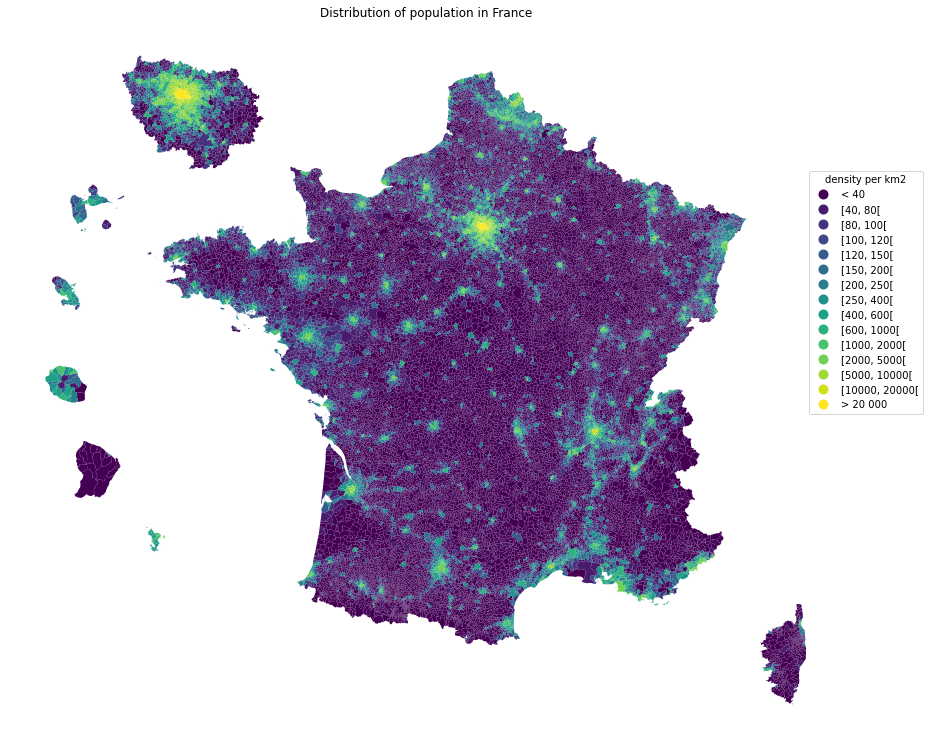

In [10]:
fig, ax = plt.subplots(1,1,figsize=[15,15])
mapplot.plot(column='range', cmap=cm.viridis,
    legend=True, ax=ax,
    legend_kwds={'bbox_to_anchor': (1.1, 0.8),
                 'title':'density per km2'})
ax.set_axis_off()
ax.set(title='Distribution of population in France')
plt.show()

fig.savefig('pop_france.svg',
            format='svg', dpi=1200,
            bbox_inches = 'tight',
            pad_inches = 0)